ноутбук в колаб: https://colab.research.google.com/drive/1lwn8HjZw635X8fnvVoCpImZb2M3PqzAN?usp=sharing

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Статистика

Несомненно, для того, чтобы быть высокопрофессиональным специалистом в области машинного обучения, крайне важно умение обучать современные и высокоточные модели. Тем не менее, часто неясно, когда улучшения являются значительными, или только в результате случайных колебаний в процессе обучения. Чтобы иметь возможность обсуждать неопределенность в оценочных значениях, мы должны изучить некоторые статистические данные.

Самое раннее упоминание о статистике можно проследить до арабского ученого Аль-Кинди в 9 веке - веке, который дал подробное описание того, как использовать статистику и анализ частоты для расшифровки зашифрованных сообщений. Спустя 800 лет современная статистика появилась в Германии в 1700-х годах, когда исследователи сосредоточились на сборе и анализе демографических и экономических данных. Сегодня статистика является предметом науки, который касается сбора, обработки, анализа, интерпретации и визуализации данных. Более того, основная теория статистики широко использовалась в исследованиях в научных кругах, промышленности и правительстве.

Статистику можно разделить на описательную статистику и статистический вывод. Первый фокусируется на обобщении и иллюстрации особенностей набора наблюдаемых данных, который называется «выборкой». Выборка взята из совокупности, обозначает общий набор похожих людей, предметов или событий нашего экспериментального интереса. В отличие от описательной статистики, статистический вывод дополнительно выводит характеристики совокупности из данных образцов (сэмплов), исходя из предположения, что распределение выборок может в некоторой степени повторять распределение совокупности.

Вы можете спросить: «В чем принципиальная разница между машинным обучением и статистикой?» В сущности, статистика фокусируется на проблеме вывода. Этот тип проблем включает в себя моделирование взаимосвязи между переменными, например, причинно-следственные связи, и проверку статистической значимости параметров модели, таких как A / B-тестирование. Напротив, машинное обучение делает упор на точных предсказаниях без явного программирования и понимания функциональности каждого параметра.
 
В этом уроке мы рассмотрим три типа статистических выводов: оценка и сравнение оценщиков, проведение проверки гипотез и построение доверительных интервалов. Эти методы могут помочь нам определить характеристики данной совокупности, то есть истинный параметр $\theta$. Для краткости предположим, что истинный параметр $\theta$ данной совокупности является скалярным значением. (И перейти к случаю, когда $\theta$ является вектором)

## Оценка и сравнение оценщиков

В статистике оценка - это функция заданных выборок, используемая для оценки истинного параметра $\theta$. Мы напишем $\hat{\theta}_n = \hat{f}(x_1, \ldots, x_n)$ для оценки $\theta$ после наблюдения сэмплов {$x_1, x_2, \ldots, x_n$} ,

Если у вас есть число выборок из случайной величины Бернулли, то максимальная оценка вероятности для случайной величины равна единице, она может быть получена путем подсчета числа наблюдаемых и деления на общее количество выборок.

В качестве примера мы показываем ниже истинную плотность гауссовой случайной величины со средним нулем и дисперсией один, а также выборки из этого гауссова значения. Мы построили координату $y$, чтобы каждая точка была видимой, а связь с исходной плотностью более ясной.

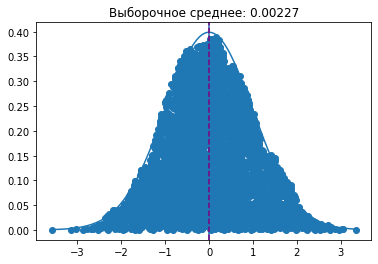

In [31]:
import random 

epsilon = 0.1
random.seed(8675309)
xs = np.random.normal(loc=0, scale=1, size=(3000,))

ys = [np.sum(np.exp(-(xs[0:i] - xs[i])**2 / (2 * epsilon**2))
             / np.sqrt(2*np.pi*epsilon**2)) / len(xs) for i in range(len(xs))]

xd = np.arange(np.min(xs), np.max(xs), 0.01)
yd = np.exp(-xd**2/2) / np.sqrt(2 * np.pi)

plt.plot(xd, yd)
plt.scatter(xs, ys)
plt.axvline(x=0)
plt.axvline(x=np.mean(xs), linestyle='--', color='purple')
plt.title("Выборочное среднее: {:.5f}".format(float(np.mean(xs))))
plt.show()

Может быть много способов вычислить оценку параметра $\hat{\theta}_n$. Далее мы представляем три распространенных метода оценки и сравнения оценок: среднеквадратическая ошибка, стандартное отклонение и статистическое отклонение.

### Средняя квадратическая ошибка

Возможно, самой простой метрикой, используемой для оценки оценщиков, является среднеквадратическая ошибка (MSE) (или потеря $l_2$) оценки, которая может быть определена как 

$$\mathrm{MSE} (\hat{\theta}_n, \theta) = E[(\hat{\theta}_n - \theta)^2].$$
 
В более привычном виде
$$
\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^{n}\left(\theta_i-\hat{\theta}_i\right)^{2}
$$

Она позволяет нам определить среднеквадратичное отклонение от истинного значения. MSE всегда неотрицательна. Она является наиболее часто используемой функцией потери для задачи регрессии. В качестве меры для оценки оценщика, чем ближе его значение к нулю, тем ближе оценщик к истинному параметру $\theta$.

### Статистическое смещение

MSE предоставляет естественную метрику, но мы можем легко представить примеры, которые могут сделать ее большой. Двумя принципиально важными являются колебания в оценке из-за случайности в наборе данных и систематическая ошибка в оценке из-за процедуры оценки.

Во-первых, давайте измерим систематическую ошибку. Для оценщика $\hat{\theta}_n$ математическая иллюстрация *статистического смещения* может быть определена как

$$\mathrm{bias}(\hat{\theta}_n) = E(\hat{\theta}_n - \theta) = E(\hat{\theta}_n) - \theta.$$

Обратите внимание, что когда $\mathrm{bias}(\hat{\theta}_n) = 0$, ожидание оценки $\hat{\theta}_n$ равно истинному значению параметра. В этом случае мы говорим, что $\hat{\theta}_n$ является несмещенной оценкой. В целом, несмещенная оценка лучше поскольку ее ожидание совпадает с истинным параметром.

Однако стоит помнить, что смещенные оценки часто используются на практике. Есть случаи, когда объективные оценки не существуют без дополнительных предположений или трудно поддаются вычислениям. Это может показаться существенным недостатком в оценке, однако большинство оценщиков, встречающихся на практике, по крайней мере асимптотически несмещены в том смысле, что смещение стремится к нулю, так как количество доступных выборок стремится к бесконечности: $\lim_{n \rightarrow \infty} \mathrm{bias}(\hat{\theta}_n) = 0$.

### Дисперсия и стандартное отклонение

Во-вторых, давайте измерим случайность в оценке. *стандартное отклонение* определяется как квадратный корень дисперсии. Мы можем измерить степень флуктуации оценки, измеряя стандартное отклонение или дисперсию этой оценки.

$$\sigma_{\hat{\theta}_n} = \sqrt{\mathrm{Var} (\hat{\theta}_n )} = \sqrt{E[(\hat{\theta}_n - E(\hat{\theta}_n))^2]}.$$

Важно сравнить с mse. В этом уравнении мы не сравниваем с истинным значением совокупности $\theta$, а вместо этого имеем $E(\hat{\theta}_n)$, ожидаемое среднее значение выборки. Таким образом, мы не измеряем как отклонена оценка от истинного значения, но вместо этого мы измеряем флуктуации самой оценки.

### Дилемма смещения–дисперсии

![](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png)

Интуитивно понятно, что эти два компонента вносят вклад в среднеквадратическую ошибку. Что несколько шокирует, так это то, что мы можем показать, что на самом деле это «разложение» среднеквадратичной ошибки на два вклада. То есть мы можем записать среднеквадратическую ошибку как сумму дисперсии и квадрата смещения.

$$
\begin{aligned}
\mathrm{MSE} (\hat{\theta}_n, \theta) &= E[(\hat{\theta}_n - E(\hat{\theta}_n) + E(\hat{\theta}_n) - \theta)^2] \\
 &= E[(\hat{\theta}_n - E(\hat{\theta}_n))^2] + E[(E(\hat{\theta}_n) - \theta)^2] \\
 &= \mathrm{Var} (\hat{\theta}_n) + [\mathrm{bias} (\hat{\theta}_n)]^2.\\
\end{aligned}
$$

Среднеквадратичная ошибка может быть разделена точно на два источника ошибки: ошибка от высокого смещения и ошибка от высокой дисперсии. С одной стороны, ошибка смещения обычно наблюдается в простой модели (такой как модель линейной регрессии), которая не может извлечь высокоразмерные отношения между признаками и выходными данными. Если модель страдает от ошибки высокого смещения, мы часто говорим, что это *недообучение* или отсутствие *обобщения*,. С другой стороны, другой источник ошибок - высокая дисперсия, как правило, является результатом слишком сложной модели, которая соответствует обучающим данным. В результате модель «переоснащается» чувствительна к небольшим колебаниям данных. Если модель страдает от высокой дисперсии, мы часто говорим, что это *переобучение* и отсутстует *гибкость*.


### Оценка оценщиков в коде

In [4]:
# смещение
def stat_bias(true_theta, est_theta):
    return(np.mean(est_theta) - true_theta)

# mse
def mse(data, true_theta):
    return(np.mean(np.square(data - true_theta)))

Чтобы проиллюстрировать уравнение компромисса смещения дисперсии, давайте смоделируем нормальное распределение  $\mathcal{N}(\theta, \sigma^2)$ с выборкой  $10,000$ . Здесь мы используем $ \ theta = 1 $ и $ \ sigma = 4 $. Так как оценка является функцией данных выборок, здесь мы используем среднее значение выборок в качестве оценки истинного $\theta$ в этом нормальном распределении $\mathcal{N}(\theta, \sigma^2)$ 

In [16]:
theta_true = 1
sigma = 4
sample_len = 10000
samples = np.random.normal(theta_true, sigma, sample_len)
theta_est = np.mean(samples)
theta_est

0.9652255803112474

Давайте посмотрим на компромисс путем вычисления суммы квадратов смещения и дисперсии нашей оценки. Сначала вычислите MSE нашего оценщика.

In [17]:
mse(samples, theta_true)

15.586274953249248

Затем мы вычисляем $\mathrm{Var} (\hat{\theta}_n) + [\mathrm{bias} (\hat{\theta}_n)]^2$ , как показано ниже.

In [23]:
bias = stat_bias(theta_true, theta_est)
np.square(samples.std()) + np.square(bias)

15.586274953249248

вопрос: зачем возводить в квадрат samples.std?

## Проведение проверки гипотез
- Проверка гипотез "с нуля" http://mathprofi.ru/statisticheskie_gipotezy.html

Наиболее часто встречающаяся тема статистического вывода - проверка гипотез.

**Проверка гипотезы** - это способ оценки некоторых данных по сравнению с утверждением по умолчанию о совокупности. Мы называем оператор по умолчанию **нулевой гипотезой $H_0$**, которую мы пытаемся отклонить, используя наблюдаемые данные. Здесь мы используем $H_0$ в качестве отправной точки для проверки статистической значимости. **Альтернативная гипотеза $H_A $ (или $ H_1 $)** - это утверждение, которое противоречит нулевой гипотезе. Нулевая гипотеза часто высказывается в декларативной форме, которая устанавливает связь между переменными. Он должен отражать краткое изложение как можно более четко и быть проверяемым теорией статистики.

Представь, что ты химик. Проведя тысячи часов в лаборатории, вы разрабатываете новое лекарство, которое может значительно улучшить способность понимать математику. Чтобы показать его магическую силу, вам нужно проверить его. Естественно, вам могут понадобиться некоторые добровольцы, чтобы принять лекарство и посмотреть, поможет ли оно лучше изучить математику. Как вы начали?

Во-первых, вам нужно будет тщательно выбрать случайным образом две группы добровольцев, чтобы не было разницы между их способностью понимать математику, измеряемой некоторыми показателями. Эти две группы обычно называют тестовой группой и контрольной группой. *Тестовая группа* (или *группа лечения*) - это группа людей, которые будут испытывать лекарство, в то время как * контрольная группа * представляет группу пользователей, которые определены в качестве эталона, т. Е. Идентичные настройки среды, за исключением принятия этого лекарство. Таким образом, влияние всех переменных сводится к минимуму, кроме влияния независимой переменной в лечении.

Во-вторых, после периода приема лекарств вам нужно будет измерить математическое понимание двух групп с помощью одних и тех же показателей, например позволить волонтерам проходить одинаковые тесты после изучения новой математической формулы. Затем вы можете собрать их показатели и сравнить результаты. В этом случае наша нулевая гипотеза будет состоять в том, что между этими двумя группами нет различий, и наш альтернативный вариант будет таковым.

Это все еще не полностью формально. Есть много деталей, которые вы должны тщательно продумать. Например, какие метрики подходят для проверки их способности понимать математику? Сколько добровольцев для вашего теста, чтобы вы могли быть уверены, что заявить об эффективности вашего лекарства? Как долго вы должны запустить тест? Как вы решаете, есть ли разница между двумя группами? Вы заботитесь только о средней производительности, или вам также варьируется диапазон оценок. И так далее.

Таким образом, проверка гипотез обеспечивает основу для экспериментального дизайна и обоснования уверенности в наблюдаемых результатах. Если мы теперь можем показать, что нулевая гипотеза вряд ли верна, мы можем с уверенностью отвергнуть ее.

Чтобы завершить рассказ о том, как работать с проверкой гипотез, нам нужно теперь ввести некоторую дополнительную терминологию и сделать некоторые из наших концепций выше формальными.




**Нулевая гипотеза $H_0$** — некоторое предположение о распределении вероятностей, породившем наблюдаемую выборку данных $x^m = (x_1,\ldots,x_m)$. Статистический тест позволяет проверить, согласуется ли наблюдаемая выборка с этим распределением (тогда нулевая гипотеза принимается), или не согласуется (тогда нулевая гипотеза отвергается). Примером нулевой гипотезы в педагогике является утверждение о том, что различие в результатах выполнения двумя группами учащихся одной и той же контрольной работы вызвано лишь случайными причинами.

Нулевая гипотеза может быть принята или отвергнута только с некоторой вероятностью ( см. Уровень значимости)

**Альтернативная гипотеза $H_A $ (или $ H_1 $)** - это утверждение, которое противоречит нулевой гипотезе.

 Так, для упомянутого выше примера гипотезы $H_0$в педагогике одна из возможных альтернатив $ H_1 $  будет определена  как:  уровни выполнения работы в двух группах учащихся различны и это различие определяется влиянием неслучайных факторов, например, тех или других методов обучения.

Выдвинутая гипотеза может быть правильной или неправильной, поэ­тому возникает необходимость проверить ее. Так как проверку произво­дят статистическими методами, то данная проверка называется статистической.
При проверке статистических гипотез возможны ошибки (ошибочные суждения) двух видов:

—   можно отвергнуть нулевую гипотезу, когда она на самом деле верна (так называемая **ошибка первого рода**);

—   можно принять нулевую гипотезу, когда она на самом деле не верна (так называемая **ошибка второго рода**).

Ошибка, состоящая в принятии нулевой гипотезы, когда она ложна, качественно отличается от ошибки, состоящей в отвержении гипотезы, когда она истинна. Эта разница очень существенна вследствие того, что различна значимость этих ошибок.

если кратко, то **Уровень значимости** – это вероятность ошибки первого рода при принятии решения (вероятность ошибочного отклонения нулевой гипотезы).

## Ошибки первого и второго рода

**Ошибка первого рода** — ситуация, когда отвергнута правильная нулевая гипотеза (англ. type I errors, α errors, false positive, ошибочное отвержение)

**Ошибка второго рода** — ситуация, когда принята неправильная нулевая гипотеза (англ. type II errors, β errors, false negative, ошибочное принятие). В математической статистике это ключевые понятия задач проверки статистических гипотез.



<img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_10/imgs/1_2_errors.png?raw=true" width=500 />

С учётом вышесказанного, **ошибку первого рода** часто называют ложной тревогой, ложным срабатыванием или **ложноположительным срабатыванием**. Если, например, анализ крови показал наличие заболевания, хотя на самом деле человек здоров, или металлодетектор выдал сигнал тревоги, сработав на металлическую пряжку ремня, то принятая гипотеза не верна, а следовательно совершена ошибка первого рода. Слово «ложноположительный» в данном случае не имеет отношения к желательности или нежелательности самого события.

Термин широко используется в медицине. Например, тесты, предназначенные для диагностики заболеваний, иногда дают положительный результат (то есть показывают наличие заболевания у пациента), когда на самом деле пациент этим заболеванием не страдает. Такой результат называется **ложноположительным.**

### Пример из практики:

Перед вами матрица для модели кредитного скоринга: 

класс 1 — это клиенты, честно вернувшие кредит в срок, класс 0 — недобросовестные заемщики.

<img src="https://nplus1.ru/images/2020/03/25/3d659dc807d152c439cd32df53ea12e9.png" width=700 />

True Positive, True Negative - истинное утверждение и отрицание соответственно;  False Negative - если факт отрицается, а на самом деле есть; False Positive - факт утверждается, на самом деле ничего не произошло.

Например:

- Модель предсказала, что заемщик вернет кредит, и он его вернул. Это называется английским термином **True Positive, TP**
- Модель предсказала, что заемщик не вернет кредит, а он его вернул. Это называется английским термином **False Negative, FP**
- Модель предсказала, что заемщик вернет кредит, а он не вернул его. Это называется английским термином **False Positive, FP**
- Модель предсказала, что заемщик не вернет кредит, и он не вернул. Это называется английским термином **True Negative, TN**

Теперь перед вами результат работы модели, которая предсказывала уход клиентов. y=1 — клиент ушел, y=0 клиент не ушел.

<img src="https://nplus1.ru/images/2020/03/25/1916a3f0e126b658767560f8b349fb5f.png" width=700 />

Из таблицы мы узнаем, что:

- Всего от компании ушло 1000 клиентов. Если сложить данные из столбца y = 1 (все ушедшие клиенты), выйдет как раз тысяча.
- Модель спрогнозировала, что от компании уйдут 1300 человек. Если сложить данные из строки y＾ = 1 (все, кого модель отнесла к классу «ушедшие клиенты»), выйдет как раз одна тысяча триста человек.
- Модель не смогла предсказать уход (проигнорировала) 200 человек. Именно этот факт отражен в строке y＾ = 0 (false negative) — модель считала, что эти люди останутся с компанией, а по факту те планировали отказаться от ее услуг.

### метрики качества в задаче бинарной классификации

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является **accuracy** — доля правильных ответов алгоритма: 
$$
\text {accuracy}=\frac{T P+T N}{T P+T N+F P+F N}
$$

**Precision** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а **recall** показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
$$
\text {precision}=\frac{T P}{T P+F P}
$$


$$
\text {recall}=\frac{T P}{T P+F N}
$$

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера — среднее гармоническое (в общем случае $F_{\beta}$) precision и recall :

$$
F_{\beta}=\left(1+\beta^{2}\right) \cdot \frac{p r e c i s i o n \cdot \text { recall}}{\left(\beta^{2} \cdot \text { precision }\right)+\text { recall }}
$$


Пример:

Рассмотрим задачу multi-class classification.

Модель предсказывает 77 примеров правильно, 23 - неправильно для класса 1, 95 - правильно и пять - неправильно для класса 2. Мы можем вычислить recall для этой модели следующим образом:

- Recall = (TruePositives_1 + TruePositives_2) / ((TruePositives_1 + TruePositives_2) + (FalseNegatives_1 + FalseNegatives_2))
- Recall = (77 + 95) / ((77 + 95) + (23 + 5))
- Recall = 172 / (172 + 28)
- Recall = 172 / 200
- Recall = 0.86

Модель делает прогнозы и предсказывает 70 примеров для первого класса, где 50 правильных и 20 неправильных. Также модель предсказывает 150 для второго класса, из которых 99 правильных и 51 неверных. Для этой модели precision можно рассчитать следующим образом:

- Precision = (TruePositives_1 + TruePositives_2) / ((TruePositives_1 + TruePositives_2) + (FalsePositives_1 + FalsePositives_2) )
- Precision = (50 + 99) / ((50 + 99) + (20 + 51))
- Precision = 149 / (149 + 71)
- Precision = 149 / 220
- Precision = 0.677

In [8]:
# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.677


In [9]:
# calculate precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average='micro')
print('Precision: %.3f' % precision)

Precision: 0.988


Другой пример (для бинароной классификации)

In [10]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.750


## Вероятности ошибок (уровень значимости и мощность)

Подробнее с примерами:

- http://statistica.ru/theory/proverka-gipotez/

- https://tsput.ru/res/informat/mop/lections/lection_4.htm

Вероятность ошибки первого рода при проверке статистических гипотез называют **уровнем значимости** и обычно обозначают греческой буквой $\alpha$  (отсюда название  $\alpha$ -errors).

Вероятность ошибки второго рода не имеет какого-то особого общепринятого названия, на письме обозначается греческой буквой 
$\beta$  (отсюда 
$\beta$ -errors). Однако с этой величиной тесно связана другая, имеющая большое статистическое значение — **мощность критерия**. Она вычисляется по формуле $(1-\beta )$. Таким образом, чем выше мощность, тем меньше вероятность совершить ошибку второго рода.

В статистических тестах обычно приходится идти на компромисс между приемлемым уровнем ошибок первого и второго рода. Зачастую для принятия решения используется пороговое значение, которое может варьироваться с целью сделать тест более строгим или, наоборот, более мягким. Этим пороговым значением является уровень значимости, которым задаются при проверке статистических гипотез. Например, в случае металлодетектора повышение чувствительности прибора приведёт к увеличению риска ошибки первого рода (ложная тревога), а понижение чувствительности — к увеличению риска ошибки второго рода (пропуск запрещённого предмета).

### Статистическая значимость

*Статистическая значимость* измеряет вероятность ошибочного отклонения нулевой гипотезы, $H_0$, когда ее не следует отвергать, т.е.,

$$ \text{statistical significance }= 1 - \alpha = P(\text{reject } H_0 \mid H_0 \text{ is true} ).$$

Это также упоминается как *ошибка типа I* или *ложное срабатывание*. $\alpha$ называется *уровнем значимости*, и его обычно используемое значение составляет $ 5 \% $, то есть $ 1- \ alpha = 95 \% $. Уровень статистической значимости можно объяснить уровнем риска, который мы готовы принять, когда отвергаем истинную нулевую гипотезу.

Формула показывает значения наблюдений и вероятность данного нормального распределения в тесте гипотезы с двумя выборками. Если точка данных наблюдения находится за пределами порога $95\%$ $, это будет очень маловероятным наблюдением в предположении нулевой гипотезы. Следовательно, может быть что-то не так с нулевой гипотезой, и мы отвергнем ее. 

В статистике величину (значение) переменной называют статистически значимой, если мала вероятность случайного возникновения этой или ещё более крайних величин. Здесь под крайностью понимается степень отклонения тестовой статистики от нуль-гипотезы.


### Статистическая мощность

*Статистическая мощность* (или *чувствительность*) измеряет вероятность отклонения нулевой гипотезы, $H_0$, когда она должна быть отклонена, т.е.

$$ \text{statistical power }= P(\text{reject } H_0  \mid H_0 \text{ is false} ).$$

Напомним, что ошибка *типа I* - это ошибка, вызванная отклонением нулевой гипотезы, когда она истинна, тогда как ошибка *типа II* является результатом отказа отклонить нулевую гипотезу, когда она ложна. Ошибка типа II обычно обозначается как $ \ beta $, и, следовательно, соответствующая статистическая мощность равна $ 1- \ beta $.

Интуитивно понятно, что статистическую мощность можно интерпретировать как вероятность того, что наш тест обнаружит реальное расхождение некоторой минимальной величины при желаемом уровне статистической значимости. $ 80 \% $ - это обычно используемый порог статистической мощности. Чем выше статистическая мощность, тем больше у нас шансов обнаружить истинные различия.

Одним из наиболее распространенных видов использования статистической мощности является определение необходимого количества выборок. Вероятность того, что вы отклоните нулевую гипотезу, когда она ложна, зависит от степени, в которой она ложна (так называемый *размер эффекта*), и от количества образцов, которые у вас есть. Как и следовало ожидать, небольшие размеры эффекта потребуют очень большого количества выборок, которые можно обнаружить с высокой вероятностью. В то время как за рамками этого краткого приложения для детального вывода, в качестве примера, хотелось бы иметь возможность отклонить нулевую гипотезу о том, что наша выборка получена из средней нулевой дисперсии, равной одному гауссовскому, и мы считаем, что среднее значение нашей выборки фактически близко к единице. мы можем сделать это с приемлемым уровнем ошибок при размере выборки всего 8. Однако, если мы считаем, что истинное среднее значение нашей выборки близко к 0,01, нам понадобится размер выборки около 80000, чтобы обнаружить разницу.

Мы можем представить мощность как фильтр для воды. В этой аналогии проверка гипотезы высокой мощности подобна системе фильтрации воды высокого качества, которая максимально снизит количество вредных веществ в воде. С другой стороны, меньшее расхождение похоже на некачественный водяной фильтр, где некоторые относительно мелкие вещества могут легко выходить из зазоров. Точно так же, если статистическая мощность недостаточно велика, тест может не уловить меньшее расхождение.

### Тестовая статистика

*Статистика теста* $ T (x) $ - некоторая функция от исходных данных, по значению которой проверяется нулевая гипотеза. Чаще всего статистика критерия является числовой функцией, но она может быть и любой другой функцией, например, многомерной функцией. Цель определения такой статистики заключается в том, что она должна позволить нам различать различные распределения и проводить проверку гипотез. Возвращаясь к нашему примеру химика, если мы хотим показать, что одна группа населения работает лучше, чем другая, было бы разумно принять среднее значение в качестве тестовой статистики. Различный выбор статистики теста может привести к статистической проверке с радикально различной статистической силой.

Часто $ T (X) $ (распределение тестовой статистики по нашей нулевой гипотезе) будет следовать, по крайней мере, приблизительно, общему распределению вероятности, такому как нормальное распределение, если рассматривать его при нулевой гипотезе. Если мы сможем явно получить такое распределение, а затем измерить нашу тестовую статистику по нашему набору данных, мы можем смело отвергнуть нулевую гипотезу, если наша статистика находится далеко за пределами диапазона, который мы ожидаем. Делая это количественным, мы приводим к понятию $ p $ -значений.

### $ Р $ -value

$ P $ -значение (или *значение вероятности*) - это вероятность того, что $ T (X) $, по крайней мере, столь же экстремальна, как наблюдаемая тестовая статистика $ T (x) $, предполагая, что нулевая гипотеза *истинна*, т.е.

$$ p\text{-value} = P_{H_0}(T(X) \geq T(x)).$$

P-значение - величина, используемая при тестировании статистических гипотез. Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода). Проверка гипотез с помощью P-значения является альтернативой классической процедуре проверки через критическое значение распределения.

Обычно P-значение равно вероятности того, что случайная величина с данным распределением (распределением тестовой статистики при нулевой гипотезе) примет значение, не меньшее, чем фактическое значение тестовой статистики.

Если значение $ p $ меньше или равно заданному и фиксированному уровню статистической значимости $\alpha$, мы можем отклонить нулевую гипотезу. В противном случае мы сделаем вывод, что у нас нет доказательств, чтобы отвергнуть нулевую гипотезу. Для данного распределения населения *область отторжения* будет интервалом, содержащим все точки, у которых значение $ p $ меньше, чем уровень статистической значимости $\alpha$.


### Односторонний тест и двусторонний тест

Обычно существует два вида теста значимости: односторонний тест и двусторонний тест. *Односторонний тест* (или *односторонний тест*) применим, когда нулевая гипотеза и альтернативная гипотеза имеют только одно направление. Например, нулевая гипотеза может утверждать, что истинный параметр $\theta$ меньше или равен значению $ c $. Альтернативная гипотеза заключается в том, что $\theta$ больше, чем $ c $. То есть область отклонения находится только на одной стороне распределения выборки. В отличие от одностороннего теста, *двусторонний тест* (или *двусторонний тест*) применим, когда область отклонения находится по обе стороны от распределения выборки. Пример в этом случае может иметь нулевую гипотезу о том, что истинный параметр $\theta$ равен значению $ c $. Альтернативная гипотеза состоит в том, что $\theta$ не равно $ c $.

### Основные этапы проверки гипотез

Ознакомившись с вышеизложенными понятиями, давайте пройдемся по основным этапам проверки гипотез.

1. Сформулируйте вопрос и установите нулевые гипотезы $H_0$.
2. Установите уровень статистической значимости $\alpha$ и статистическую мощность ($ 1 - \ beta $).
3. Получить образцы с помощью экспериментов. Количество необходимых выборок будет зависеть от статистической мощности и ожидаемого размера эффекта.
4. Рассчитайте статистику теста и значение $ p $.
5. Примите решение оставить или отклонить нулевую гипотезу на основе значения $ p $ и уровня статистической значимости $\alpha$.

Чтобы провести проверку гипотезы, мы начнем с определения нулевой гипотезы и уровня риска, на который мы готовы пойти. Затем мы вычисляем тестовую статистику выборки, принимая экстремальное значение тестовой статистики в качестве доказательства против нулевой гипотезы. Если тестовая статистика попадает в область отклонения, мы можем отклонить нулевую гипотезу в пользу альтернативы.

Проверка гипотез применима в различных сценариях, таких как клинические исследования и A / B-тестирование.




## Построение доверительных интервалов

**Доверительным** называют интервал, который покрывает неизвестный параметр с заданной надёжностью.

Доверительным называется интервал, в который попадают измеренные в эксперименте значения, соответствующие **доверительной вероятности**.

<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/img/doverit_interval.png?raw=true" width=450 /><center>

Выборочное среднее $\bar{x}$ имеет нормальное распределение, если объем выборки большой, поэтому можно применить знания о нормальном распределении при рассмотрении выборочного среднего.
В частности, 95% распределения выборочных средних находится в пределах 1,96 стандартных отклонений (SD) среднего популяции.
Когда у нас есть только одна выборка, мы называем это стандартной ошибкой среднего (SEM)  и вычисляем 95% доверительного интервала для среднего следующим образом:
$$
\bar{x}-(1,96 \times S E M) ; \quad \bar{x}+(1,96 \times S E M)
$$

Стандартная ошибка среднего подсчитывается следующим образом:  
$$
S E M=\frac{s}{\sqrt{n}}
$$
где s - стандартное отклонение, подсчитанное по выборке,

n – число наблюдений в выборке.

Если повторить этот эксперимент несколько раз, то интервал будет содержать истинное среднее популяции в 95% случаев.

Обычно это доверительный интервал как, например, интервал значений, в пределах которого с доверительной вероятностью 95% находится истинное  среднее популяции (генеральное среднее).

Хотя это не вполне строго (среднее в популяции есть фиксированное значение и поэтому не может иметь вероятность, отнесённую к нему) таким образом интерпретировать доверительный интервал, но концептуально это удобнее для понимания.


При оценке значения параметра $\theta$ точечные оценки, такие как $\hat \theta$, имеют ограниченную полезность, поскольку они не содержат понятия неопределенности. Скорее, было бы намного лучше, если бы мы могли создать интервал, который содержал бы истинный параметр $\theta$ с высокой вероятностью. 
Чтобы быть полезным, доверительный интервал должен быть как можно меньше для данной степени уверенности. Давайте посмотрим, как это получить.

### Определение

http://statistica.ru/theory/doveritelnye-intervaly/

Математически *доверительный интервал* для истинного параметра $\theta$ - это интервал $C_n$, который вычисляется из данных выборки таким образом, чтобы

$$P_{\theta} (C_n \ni \theta) \geq 1 - \alpha, \forall \theta.$$

Здесь $\alpha \in (0, 1)$, а $1 - \alpha$ называется *уровнем достоверности* или *охватом интервала*. Это тот же  $\alpha$, что и уровень значимости, о котором мы говорили выше.

Обратите внимание, что относится к переменной $C_n$, а не к фиксированной $\theta$. Чтобы подчеркнуть это, мы пишем $P_{\theta} (C_n \ni \theta)$ cкорее чем $P_{\theta} (\theta \in C_n)$

### Интерпретация

При интерпретации доверительного интервала нас интересуют следующие вопросы:

**Насколько широк доверительный интервал?**

Широкий доверительный интервал указывает на то, что оценка неточна; узкий указывает на точную оценку.
Ширина доверительного интервала зависит от размера стандартной ошибки, которая, в свою очередь, зависит от объёма выборки и при рассмотрении числовой переменной от изменчивости данных дают более широкие доверительные интервалы, чем исследования многочисленного набора данных немногих переменных.

**Включает ли ДИ какие-либо значения, представляющие особенный интерес?**

Можно проверить, ложится ли вероятное значение для параметра популяции в пределы доверительного интервала. Если да, то результаты согласуются с этим вероятным значением. Если нет, тогда маловероятно (для 95% доверительного интервала шанс почти 5%), что параметр имеет это значение.

In [11]:

N = 1000

samples = np.random.normal(loc=0, scale=1, size=(N,))


t_star = 1.96

mu_hat = np.mean(samples)
sigma_hat = samples.std(ddof=1)
(mu_hat - t_star*sigma_hat/np.sqrt(N), mu_hat + t_star*sigma_hat/np.sqrt(N))

(-0.11531571313004071, 0.01053762818812684)

Вопрос:

Откуда взято число t_star = 1.96?

Подробнее:

https://ru.wikipedia.org/wiki/Распределение_Стьюдента

**Доп. материалы**

- краткое введение в статистику: https://drive.google.com/file/d/1PRoCYkHLvSQI7IUqwt3bkcdbRrQ_EW2P/view